<a href="https://colab.research.google.com/github/nagarajesht/interview-question-data-science-/blob/master/SentimentAnalysis_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Assignment

In this project you will be working on two different datasets in which one dataset contains news
headlines with unlabeled sentiments. And another dataset contains labeled tweets from the
twitter data.  

**Twitter Data:**

*   ID  - Id of the tweet
*   Brand - Brand associated with the tweet
*   Sentiment - Sentiment Label for the tweet
*   Phrase - The actual phrase

**News Data:**

*   Time stamp  - Date of the headline
*   Headline - Headline phrase


**Tasks To be Performed:**
1. Transform the Text data to be processed for Sentiment Analysis
2. Generate Sentiments for unlabeled news headlines data.
3. Evaluate the sentiment analysis models based on accuracy. 

In [146]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


# News Dataset

## Text Data Preprocessing

In [ ]:
# Load the news headlines data
newsdata=pd.read_csv("news.csv")

In [ ]:
newsdata.head()

,publish_date,headline
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
# Check for null values in the table
newsdata.isnull().sum()

publish_date    0
headline        0
dtype: int64

In [ ]:
newsdata['headline']

0          aba decides against community broadcasting lic...
1             act fire witnesses must be aware of defamation
2             a g calls for infrastructure protection summit
3                   air nz staff in aust strike for pay rise
4              air nz strike to affect australian travellers
                                 ...                        
1048570      bill de blasio no evidence of terror connection
1048571    boyer lectures michael marmot work harming you...
1048572                     carnaby cockatoo revival program
1048573    collier convinced colin barnett has overwhelmi...
1048574    cowboys offer indigenous kids north queensland...
Name: headline, Length: 1048575, dtype: object

In [ ]:
# First lets remove Punctuations from the Reviews
import string
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

newsdata['headline'] = newsdata['headline'].apply(punctuation_removal)

In [ ]:
newsdata['headline']

0          aba decides against community broadcasting lic...
1             act fire witnesses must be aware of defamation
2             a g calls for infrastructure protection summit
3                   air nz staff in aust strike for pay rise
4              air nz strike to affect australian travellers
                                 ...                        
1048570      bill de blasio no evidence of terror connection
1048571    boyer lectures michael marmot work harming you...
1048572                     carnaby cockatoo revival program
1048573    collier convinced colin barnett has overwhelmi...
1048574    cowboys offer indigenous kids north queensland...
Name: headline, Length: 1048575, dtype: object

In [ ]:
# Now lets Remove the Stopwords also

stop=stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

newsdata['headline'] = newsdata['headline'].apply(stopwords_removal)
newsdata['headline']

0           [aba, decides, community, broadcasting, licence]
1            [act, fire, witnesses, must, aware, defamation]
2             [g, calls, infrastructure, protection, summit]
3                  [air, nz, staff, aust, strike, pay, rise]
4          [air, nz, strike, affect, australian, travellers]
                                 ...                        
1048570     [bill, de, blasio, evidence, terror, connection]
1048571    [boyer, lectures, michael, marmot, work, harmi...
1048572                [carnaby, cockatoo, revival, program]
1048573    [collier, convinced, colin, barnett, overwhelm...
1048574    [cowboys, offer, indigenous, kids, north, quee...
Name: headline, Length: 1048575, dtype: object

In [ ]:
# Perform lemmatisation

#import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(str(text))
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

newsdata['headline'] = newsdata['headline'].apply(lemmatise)
newsdata['headline']

0          [ 'aba ' , 'decides ' , 'community ' , 'broadc...
1          [ 'act ' , 'fire ' , 'witnesses ' , 'must ' , ...
2          [ ' g ' , 'calls ' , 'infrastructure ' , 'prot...
3          [ 'air ' , 'nz ' , 'staff ' , 'aust ' , 'strik...
4          [ 'air ' , 'nz ' , 'strike ' , 'affect ' , 'au...
                                 ...                        
1048570    [ 'bill ' , 'de ' , 'blasio ' , 'evidence ' , ...
1048571    [ 'boyer ' , 'lectures ' , 'michael ' , 'marmo...
1048572    [ 'carnaby ' , 'cockatoo ' , 'revival ' , 'pro...
1048573    [ 'collier ' , 'convinced ' , 'colin ' , 'barn...
1048574    [ 'cowboys ' , 'offer ' , 'indigenous ' , 'kid...
Name: headline, Length: 1048575, dtype: object

### Generate Sentiments for unlabeled news headlines data

In [ ]:
# Calculate polarity from the news headline
def get_polarity(text):
  textblob=TextBlob(text)
  pol=textblob.sentiment.polarity
  return pol

newsdata['Polarity']=newsdata['headline'].apply(get_polarity)
newsdata['Polarity']

0          0.00
1          0.25
2          0.00
3          0.00
4          0.00
           ... 
1048570    0.00
1048571    0.00
1048572    0.00
1048573    0.50
1048574    0.00
Name: Polarity, Length: 1048575, dtype: float64

In [ ]:
newsdata['Polarity'].value_counts()

 0.000000    763081
-0.200000     25095
 0.136364     21475
-0.100000     19975
 0.100000     19423
              ...  
 0.159091         1
 0.242424         1
-0.338889         1
 0.642857         1
 0.275758         1
Name: Polarity, Length: 2007, dtype: int64

In [ ]:
newsdata

,publish_date,headline,Polarity
0,20030219,"[ 'aba ' , 'decides ' , 'community ' , 'broadc...",0.00
1,20030219,"[ 'act ' , 'fire ' , 'witnesses ' , 'must ' , ...",0.25
2,20030219,"[ ' g ' , 'calls ' , 'infrastructure ' , 'prot...",0.00
3,20030219,"[ 'air ' , 'nz ' , 'staff ' , 'aust ' , 'strik...",0.00
4,20030219,"[ 'air ' , 'nz ' , 'strike ' , 'affect ' , 'au...",0.00
...,...,...,...
1048570,20160918,"[ 'bill ' , 'de ' , 'blasio ' , 'evidence ' , ...",0.00
1048571,20160918,"[ 'boyer ' , 'lectures ' , 'michael ' , 'marmo...",0.00
1048572,20160918,"[ 'carnaby ' , 'cockatoo ' , 'revival ' , 'pro...",0.00
1048573,20160918,"[ 'collier ' , 'convinced ' , 'colin ' , 'barn...",0.50


In [ ]:
newsdata.to_csv('newssentimentdata.csv')

In [ ]:
# Generate sentiment based on polarity. 
def generate_sentiment(pol):
    if pol==0:
      sent="Neutral Sentiment"
    elif pol>0:
      sent="Positve Sentiment"    
    else:
      sent= "Negative Sentiment"
    return sent      

In [ ]:
newsdata['Sentiment']=newsdata['Polarity'].apply(generate_sentiment)
newsdata['Sentiment']

0          Neutral Sentiment
1          Positve Sentiment
2          Neutral Sentiment
3          Neutral Sentiment
4          Neutral Sentiment
                 ...        
1048570    Neutral Sentiment
1048571    Neutral Sentiment
1048572    Neutral Sentiment
1048573    Positve Sentiment
1048574    Neutral Sentiment
Name: Sentiment, Length: 1048575, dtype: object

In [ ]:
sentiment_analysis=newsdata['Sentiment'].value_counts()
print(sentiment_analysis)

Neutral Sentiment     763081
Positve Sentiment     161554
Negative Sentiment    123940
Name: Sentiment, dtype: int64


In [ ]:
newsdata

,publish_date,headline,Polarity,Sentiment
0,20030219,"[ 'aba ' , 'decides ' , 'community ' , 'broadc...",0.00,Neutral Sentiment
1,20030219,"[ 'act ' , 'fire ' , 'witnesses ' , 'must ' , ...",0.25,Positve Sentiment
2,20030219,"[ ' g ' , 'calls ' , 'infrastructure ' , 'prot...",0.00,Neutral Sentiment
3,20030219,"[ 'air ' , 'nz ' , 'staff ' , 'aust ' , 'strik...",0.00,Neutral Sentiment
4,20030219,"[ 'air ' , 'nz ' , 'strike ' , 'affect ' , 'au...",0.00,Neutral Sentiment
...,...,...,...,...
1048570,20160918,"[ 'bill ' , 'de ' , 'blasio ' , 'evidence ' , ...",0.00,Neutral Sentiment
1048571,20160918,"[ 'boyer ' , 'lectures ' , 'michael ' , 'marmo...",0.00,Neutral Sentiment
1048572,20160918,"[ 'carnaby ' , 'cockatoo ' , 'revival ' , 'pro...",0.00,Neutral Sentiment
1048573,20160918,"[ 'collier ' , 'convinced ' , 'colin ' , 'barn...",0.50,Positve Sentiment


### Sentiments has been generated to the unlabelled news headlines dataset

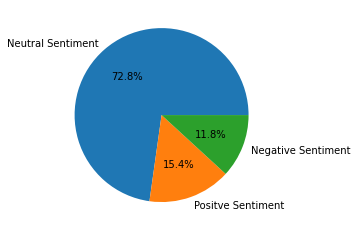

In [ ]:
Labels='Neutral Sentiment','Positve Sentiment','Negative Sentiment'
plt.pie(sentiment_analysis,labels=Labels,autopct='%1.1f%%')
plt.show()

# Twitter Dataset

## Text Data Preprocessing

In [147]:
# Load the Twitter datadset
tweets=pd.read_csv("twitter_training.csv",names=('ID','Brand','Sentiment','Phrase'),nrows=20000)

In [148]:
tweets.tail()

,ID,Brand,Sentiment,Phrase
19995,12623,WorldOfCraft,Neutral,Felt like making a solo character! A high elf ...
19996,12623,WorldOfCraft,Neutral,That Felt like my making quite a brand new cha...
19997,12623,WorldOfCraft,Neutral,Felt like being a quirky character! That wild ...
19998,12624,WorldOfCraft,Positive,"Ridiculous, but fantastic."
19999,12624,WorldOfCraft,Positive,"Ridiculous, but fantastic."


In [149]:
# Delete columns 'ID' and 'Brand' as these columns will not add value to the model
tweets.drop(['ID', 'Brand'], axis=1, inplace=True)
tweets

,Sentiment,Phrase
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
19995,Neutral,Felt like making a solo character! A high elf ...
19996,Neutral,That Felt like my making quite a brand new cha...
19997,Neutral,Felt like being a quirky character! That wild ...
19998,Positive,"Ridiculous, but fantastic."


In [150]:
tweets['Sentiment'].value_counts()

Positive      6104
Negative      5448
Neutral       4896
Irrelevant    3552
Name: Sentiment, dtype: int64

In [151]:
# The value 'Irrelevant' is not a valid sentiment type hence the rows with value 'Irrelevant' can be deleted as it is a outlier
tweets = tweets[tweets.Sentiment != 'Irrelevant']
tweets['Sentiment'].value_counts()

Positive    6104
Negative    5448
Neutral     4896
Name: Sentiment, dtype: int64

In [152]:
# check for null values in the dataset
tweets.isnull().sum()

Sentiment      0
Phrase       127
dtype: int64

In [153]:
# Delete null values in the dataset
tweets=tweets.dropna()
tweets.isnull().sum()

Sentiment    0
Phrase       0
dtype: int64

In [154]:
tweets['Sentiment']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
19995     Neutral
19996     Neutral
19997     Neutral
19998    Positive
19999    Positive
Name: Sentiment, Length: 16321, dtype: object

In [155]:
# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

tweets['Phrase'] = tweets['Phrase'].apply(punctuation_removal)
tweets['Phrase']

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you all
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
19995    Felt like making a solo character A high elf w...
19996    That Felt like my making quite a brand new cha...
19997    Felt like being a quirky character That wild e...
19998                           Ridiculous but fantastic  
19999                             Ridiculous but fantastic
Name: Phrase, Length: 16321, dtype: object

In [156]:
# Now lets Remove the Stopwords also

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop=stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

tweets['Phrase'] = tweets['Phrase'].apply(stopwords_removal)
tweets['Phrase']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                           [getting, borderlands, murder]
1                                  [coming, borders, kill]
2                             [getting, borderlands, kill]
3                            [coming, borderlands, murder]
4                        [getting, borderlands, 2, murder]
                               ...                        
19995    [felt, like, making, solo, character, high, el...
19996    [felt, like, making, quite, brand, new, charac...
19997    [felt, like, quirky, character, wild, elf, sch...
19998                              [ridiculous, fantastic]
19999                              [ridiculous, fantastic]
Name: Phrase, Length: 16321, dtype: object

In [157]:
# lets remove the Numbers also
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

tweets['Phrase'] = tweets['Phrase'].apply(drop_numbers)
tweets['Phrase']

0                               getting borderlands murder
1                                      coming borders kill
2                                 getting borderlands kill
3                                coming borderlands murder
4                               getting borderlands murder
                               ...                        
19995    felt like making solo character high elf schlo...
19996    felt like making quite brand new character hig...
19997    felt like quirky character wild elf schlong ca...
19998                                 ridiculous fantastic
19999                                 ridiculous fantastic
Name: Phrase, Length: 16321, dtype: object

In [158]:
# Perform lemmatisation
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)
tweets['Phrase'] = tweets['Phrase'].apply(lemmatise)
tweets['Phrase']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                getting borderland murder
1                                       coming border kill
2                                  getting borderland kill
3                                 coming borderland murder
4                                getting borderland murder
                               ...                        
19995    felt like making solo character high elf schlo...
19996    felt like making quite brand new character hig...
19997    felt like quirky character wild elf schlong ca...
19998                                 ridiculous fantastic
19999                                 ridiculous fantastic
Name: Phrase, Length: 16321, dtype: object

In [159]:
# remove non ASCII characters
tweets['Phrase']= tweets['Phrase'].str.encode('ascii', 'ignore').str.decode('ascii')
print("After removing non-ascii:")
tweets['Phrase']

After removing non-ascii:


0                                getting borderland murder
1                                       coming border kill
2                                  getting borderland kill
3                                 coming borderland murder
4                                getting borderland murder
                               ...                        
19995    felt like making solo character high elf schlo...
19996    felt like making quite brand new character hig...
19997    felt like quirky character wild elf schlong ca...
19998                                 ridiculous fantastic
19999                                 ridiculous fantastic
Name: Phrase, Length: 16321, dtype: object

In [160]:
# Delete null values if any in the dataset
tweets=tweets.dropna()
tweets.isnull().sum()

Sentiment    0
Phrase       0
dtype: int64

### Apply label encoding to generate multiclassification labels

In [161]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode target labels from the column 'Sentiment'.
target_labels = label_encoder.fit_transform(tweets['Sentiment'])
target_labels

array([2, 2, 2, ..., 1, 2, 2])

In [162]:
np.unique(target_labels)

array([0, 1, 2])

In [163]:
class_names=['Neutral','Negative','Positve']
# Negative - 1 (1 labelled as Negative)
# Positive - 2 (2 labelled as Positive)
# Neutral  - 0 (0 labelled as Neutral)

## Create Document term matrix using the TFIDFVectorizer

In [164]:
vec=TfidfVectorizer()
matrix=vec.fit_transform(tweets['Phrase'])
vectorized_data_features = pd.DataFrame(matrix.toarray())
vectorized_data_features

,0,1,2,3,4,5,6,7,8,9,...,10189,10190,10191,10192,10193,10194,10195,10196,10197,10198
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Model Building

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorized_data_features,target_labels, test_size=0.3)

## Predict sentiment using Random Forest Algorithm

In [166]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [167]:
# Compute metrics such as precision recall and classification for all the three classes
print(classification_report(y_test, preds, target_names=class_names))

              precision    recall  f1-score   support

     Neutral       0.94      0.91      0.92      1606
    Negative       0.95      0.86      0.90      1472
     Positve       0.86      0.95      0.90      1819

    accuracy                           0.91      4897
   macro avg       0.92      0.90      0.91      4897
weighted avg       0.91      0.91      0.91      4897



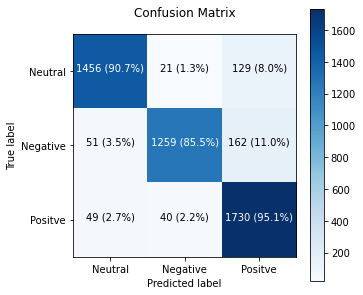

In [168]:
# Generate confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=preds,
                      classes=class_names,
                      figsize=(5, 5),
                      text_size=10)

In [85]:
# Make a prettier confusion matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

##Perform Model Building Using Naive Bayes Classifier

In [169]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
preds = gnb.predict(X_test)

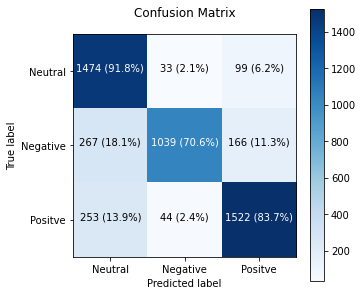

In [170]:
# Generate confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=preds,
                      classes=class_names,
                      figsize=(5, 5),
                      text_size=10)

In [171]:
# Compute metrics such as precision recall and classification for all the three classes
print(classification_report(y_test, preds, target_names=class_names))

              precision    recall  f1-score   support

     Neutral       0.74      0.92      0.82      1606
    Negative       0.93      0.71      0.80      1472
     Positve       0.85      0.84      0.84      1819

    accuracy                           0.82      4897
   macro avg       0.84      0.82      0.82      4897
weighted avg       0.84      0.82      0.82      4897



##Perform Model Building Using Neural Network

In [172]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax") # output shape is 3, activation is softmax for multiclassification
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(X_train,
                       y_train,
                       epochs=20,
                       validation_data=(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
357/357 [==============================] - 2s 5ms/step - loss: 1.0458 - accuracy: 0.5066 - val_loss: 0.9304 - val_accuracy: 0.6769
Epoch 2/20
357/357 [==============================] - 2s 6ms/step - loss: 0.7154 - accuracy: 0.7829 - val_loss: 0.5955 - val_accuracy: 0.8191
Epoch 3/20
357/357 [==============================] - 2s 5ms/step - loss: 0.4024 - accuracy: 0.8990 - val_loss: 0.4227 - val_accuracy: 0.8611
Epoch 4/20
357/357 [==============================] - 2s 5ms/step - loss: 0.2493 - accuracy: 0.9329 - val_loss: 0.3370 - val_accuracy: 0.8826
Epoch 5/20
357/357 [==============================] - 2s 5ms/step - loss: 0.1759 - accuracy: 0.9498 - val_loss: 0.3017 - val_accuracy: 0.8938
Epoch 6/20
357/357 [==============================] - 2s 5ms/step - loss: 0.1386 - accuracy: 0.9587 - val_loss: 0.2849 - val_accuracy: 0.8952
Epoch 7/20
357/357 [==============================] - 2s 5ms/step - loss: 0.1166 - accuracy: 0.9633 - val_loss: 0.2821 - val_accuracy: 0.8940
Epoch 

Text(0.5, 1.0, 'Model_14 training curves')

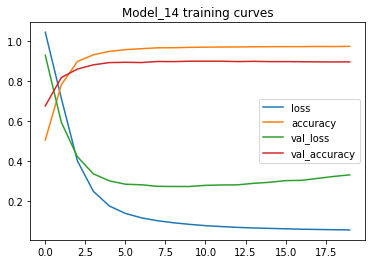

In [173]:
pd.DataFrame(history.history).plot()
plt.title("Model_14 training curves")

In [174]:
y_pred = model_14.predict(X_test)

154/154 [==============================] - 0s 2ms/step


In [176]:
# Convert all of the predictions from probabilities to labels
y_preds = y_pred.argmax(axis=1)
y_preds

array([0, 2, 2, ..., 0, 2, 2])

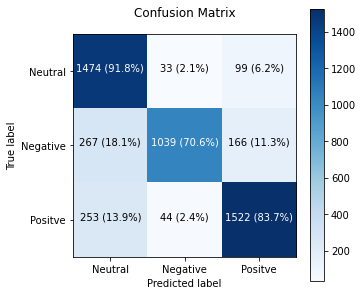

In [177]:
# Generate confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=preds,
                      classes=class_names,
                      figsize=(5, 5),
                      text_size=10)

In [178]:
# Compute metrics such as precision recall and classification for all the three classes
print(classification_report(y_test, preds, target_names=class_names))

              precision    recall  f1-score   support

     Neutral       0.74      0.92      0.82      1606
    Negative       0.93      0.71      0.80      1472
     Positve       0.85      0.84      0.84      1819

    accuracy                           0.82      4897
   macro avg       0.84      0.82      0.82      4897
weighted avg       0.84      0.82      0.82      4897

